<h1>Purpose of this notebook</h1>
The purpose of this notebook is to see the effects of data augmentation.

Data augmentation is when the data is augmented to generate multiple versions of the same image.

When only a small dataset of images is available it might show to be beneficial to use data augmentation.
Since the neural network might be overfitting the training data.

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers

Using TensorFlow backend.


<b>Resources used to train, validate and test.</b>

In [2]:
train_path = '../Retraining/resources/train'
valid_path = '../Retraining/resources/valid'
test_path = '../Retraining/resources/test'

<h1>ImageDataGenerators: Without data augmentation</h1>


In [6]:
batch_size = 16

train_datagen_wo = ImageDataGenerator(
        rescale=1./255
)

valid_datagen_wo = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator_wo = train_datagen_wo.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator_wo = valid_datagen_wo.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 299 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


<h1>ImageDataGenerators: With data augmentation</h1>
<ul>
    <li> <b>Rescale</b> rescales image data from range [0 255] to range [0 1] </li>
    <li><b>Shear_range</b> a range with how much the data is augmented with respect to shear</li>
    <li><b>Zoom_range</b> range for a random zoom. [1-zoom_range 1+zoom_range]</li>
    <li><b>Horizontal_flip:</b> boolean if it should be possible to make a random horizontal flip</li>
</ul>


Should be tested:
<ul>
    <li><b>Rotation_range</b></li>
    <li><b>brightness_range</b></li>
</ul>

In [9]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 299 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


<h1>Neural Network</h1>

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________

<h1>Utility functions</h1>

In [16]:
def plot_history(history):
    #print(history.history.keys())
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

<h1>Testing performance with data augmentation</h1>

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=299 // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=82 // batch_size)

Epoch 1/50
18/18 [==============================] - 3s 188ms/step - loss: 7.5793 - acc: 0.4836 - val_loss: 6.2458 - val_acc: 0.6125
Epoch 2/50
18/18 [==============================] - 3s 143ms/step - loss: 8.0509 - acc: 0.5005 - val_loss: 6.8380 - val_acc: 0.5758
Epoch 3/50
18/18 [==============================] - 3s 144ms/step - loss: 7.6185 - acc: 0.5238 - val_loss: 5.7789 - val_acc: 0.6364
Epoch 4/50
18/18 [==============================] - 3s 144ms/step - loss: 1.4265 - acc: 0.6554 - val_loss: 0.3324 - val_acc: 0.7424
Epoch 5/50
18/18 [==============================] - 3s 154ms/step - loss: 0.6458 - acc: 0.7222 - val_loss: 0.3766 - val_acc: 0.8030
Epoch 6/50
18/18 [==============================] - 3s 140ms/step - loss: 0.5235 - acc: 0.7969 - val_loss: 0.4302 - val_acc: 0.8030
Epoch 7/50
18/18 [==============================] - 3s 140ms/step - loss: 0.5691 - acc: 0.8057 - val_loss: 0.9196 - val_acc: 0.6875
Epoch 8/50
18/18 [==============================] - 3s 148ms/step - loss: 0.

In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255
)

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 35 images belonging to 3 classes.


In [7]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

16/16 [==============================] - 0s 2ms/step


[0.6935157179832458, 0.9375]

In [ ]:
gul_path = '../Retraining/tfpoet/tf_files/test/gulerod.jpg'
img = image.load_img(gul_path, target_size=(224, 224))
img = image.img_to_array(img)
img = img
img = np.expand_dims(img, axis=0)
out = model.predict(img)

In [ ]:
labels

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


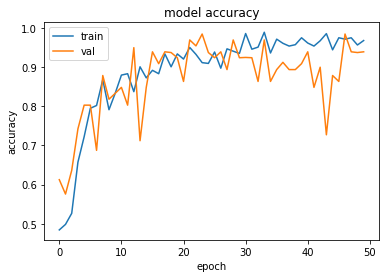

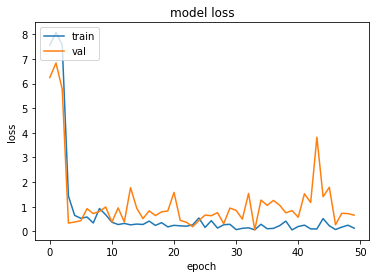

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

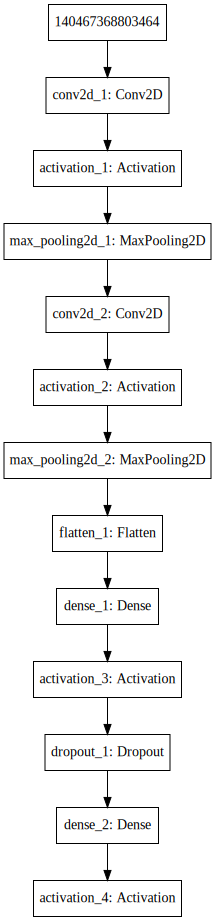

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

<h1>Testing performance without data augmentation</h1>

In [7]:
history = model.fit_generator(
            train_generator_wo,
            steps_per_epoch=299 // batch_size,
            epochs=50,
            validation_data=validation_generator_wo,
            validation_steps=82 // batch_size)

Epoch 1/50
18/18 [==============================] - 6s 351ms/step - loss: 7.8636 - acc: 0.4777 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 2/50
18/18 [==============================] - 1s 80ms/step - loss: 7.3886 - acc: 0.5372 - val_loss: 6.8380 - val_acc: 0.5758
Epoch 3/50
18/18 [==============================] - 1s 83ms/step - loss: 3.3209 - acc: 0.5387 - val_loss: 0.5179 - val_acc: 0.6970
Epoch 4/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6180 - acc: 0.7616 - val_loss: 0.6179 - val_acc: 0.7424
Epoch 5/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4105 - acc: 0.8356 - val_loss: 0.3589 - val_acc: 0.8485
Epoch 6/50
18/18 [==============================] - 1s 77ms/step - loss: 0.2990 - acc: 0.8823 - val_loss: 0.5316 - val_acc: 0.8636
Epoch 7/50
18/18 [==============================] - 1s 79ms/step - loss: 0.2310 - acc: 0.9062 - val_loss: 0.5551 - val_acc: 0.8875
Epoch 8/50
18/18 [==============================] - 2s 87ms/step - loss: 0.1836 - 

NameError: name 'test_generator' is not defined

In [11]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

16/16 [==============================] - 0s 2ms/step


[3.9464144706726074, 0.75]

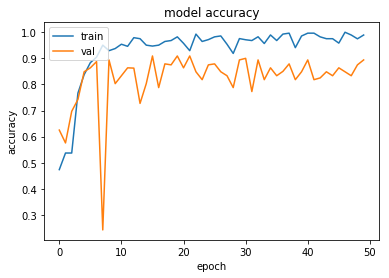

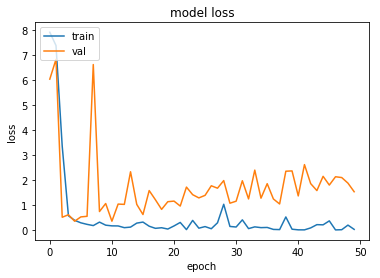

In [17]:
plot_history(history)

<h1>Testing with original image size: 1280x720</h1>

In [ ]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'